# Imports


In [8]:
# imports
import pandas as pd
import numpy as np
import os
import nibabel as nib
import matplotlib.pyplot as plt
import time
from sklearn import preprocessing
import matplotlib

# Methods

In [15]:
def normalize_col(col, doi, norm_val):
    data=(((doi[col]-doi[col].min())/(doi[col].max()-doi[col].min()))*norm_val)
    return data

In [16]:
stdata = pd.read_csv("searchterm_data_2020.csv")
truthdata = pd.read_csv("truth_data_2020.csv")
stdata.head()

,Unnamed: 0,influenza st,Influenza dis,Common Cold dis,flu st,flu symptoms st,Influenza Vaccine vacc,prevent flu st,Hand sanitizer topic,Oseltamivir med,...,Nasal Congestion syndrome,Cough topic,Cold medicine topic,Antibiotics drugtype,Antimicrobial resistance topic,Ibuprofen med,immunity st,Immunity topic,Swine influenza topic,flu medicine st
0,0,5.0,5.0,58.0,1.0,2.0,1.0,6.0,7.0,2.0,...,46.0,52.0,44.0,65.0,14.0,51.0,67.0,63.0,0.0,15.0
1,1,6.0,5.0,56.0,1.0,2.0,1.0,0.0,6.0,1.0,...,65.0,63.0,45.0,71.0,15.0,61.0,55.0,54.0,0.0,11.0
2,2,4.0,4.0,52.0,1.0,1.0,1.0,3.0,6.0,1.0,...,44.0,52.0,44.0,70.0,9.0,55.0,46.0,48.0,0.0,11.0
3,3,5.0,4.0,50.0,1.0,1.0,0.0,0.0,7.0,2.0,...,34.0,45.0,26.0,86.0,21.0,68.0,59.0,62.0,0.0,11.0
4,4,5.0,4.0,46.0,1.0,1.0,1.0,6.0,9.0,1.0,...,51.0,49.0,42.0,78.0,18.0,60.0,46.0,65.0,0.0,5.0


In [17]:
truthdata.head()

,Unnamed: 0,YEAR,WEEK,Total Cases,weeks
0,0,2004,1,862.0,852
1,1,2004,2,505.0,852
2,2,2004,3,260.0,852
3,3,2004,4,166.0,852
4,4,2004,5,107.0,852


In [14]:
x

Index(['Unnamed: 0', 'YEAR', 'WEEK'], dtype='object')

In [18]:
x=stdata.columns[0]
stdata=stdata.drop(columns=x)
stdata.head()

,influenza st,Influenza dis,Common Cold dis,flu st,flu symptoms st,Influenza Vaccine vacc,prevent flu st,Hand sanitizer topic,Oseltamivir med,Oseltamivir st,...,Nasal Congestion syndrome,Cough topic,Cold medicine topic,Antibiotics drugtype,Antimicrobial resistance topic,Ibuprofen med,immunity st,Immunity topic,Swine influenza topic,flu medicine st
0,5.0,5.0,58.0,1.0,2.0,1.0,6.0,7.0,2.0,0.0,...,46.0,52.0,44.0,65.0,14.0,51.0,67.0,63.0,0.0,15.0
1,6.0,5.0,56.0,1.0,2.0,1.0,0.0,6.0,1.0,5.0,...,65.0,63.0,45.0,71.0,15.0,61.0,55.0,54.0,0.0,11.0
2,4.0,4.0,52.0,1.0,1.0,1.0,3.0,6.0,1.0,0.0,...,44.0,52.0,44.0,70.0,9.0,55.0,46.0,48.0,0.0,11.0
3,5.0,4.0,50.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,...,34.0,45.0,26.0,86.0,21.0,68.0,59.0,62.0,0.0,11.0
4,5.0,4.0,46.0,1.0,1.0,1.0,6.0,9.0,1.0,2.0,...,51.0,49.0,42.0,78.0,18.0,60.0,46.0,65.0,0.0,5.0


13 March, 2005 is 11th week of 2005

In [19]:
truthdata[truthdata['WEEK']==11]

,Unnamed: 0,YEAR,WEEK,Total Cases,weeks
10,10,2004,11,13.0,852
62,62,2005,11,1108.0,852
114,114,2006,11,1381.0,852
166,166,2007,11,1353.0,852
218,218,2008,11,2564.0,852
271,271,2009,11,1773.0,852
323,323,2010,11,370.0,852
375,375,2011,11,2000.0,852
427,427,2012,11,2710.0,852
479,479,2013,11,1617.0,852


According to above graph, the 11th week of 2005 corresponds with index 62, meaning I don't need data values before index 62

In [20]:
truthdata = truthdata[62:]

In [21]:
truthdata.head()

,Unnamed: 0,YEAR,WEEK,Total Cases,weeks
62,62,2005,11,1108.0,852
63,63,2005,12,869.0,852
64,64,2005,13,567.0,852
65,65,2005,14,355.0,852
66,66,2005,15,176.0,852


In [22]:
truthdata = truthdata.drop(columns=x)
truthdata.head()

,YEAR,WEEK,Total Cases,weeks
62,2005,11,1108.0,852
63,2005,12,869.0,852
64,2005,13,567.0,852
65,2005,14,355.0,852
66,2005,15,176.0,852


In [23]:
stdata.head()

,influenza st,Influenza dis,Common Cold dis,flu st,flu symptoms st,Influenza Vaccine vacc,prevent flu st,Hand sanitizer topic,Oseltamivir med,Oseltamivir st,...,Nasal Congestion syndrome,Cough topic,Cold medicine topic,Antibiotics drugtype,Antimicrobial resistance topic,Ibuprofen med,immunity st,Immunity topic,Swine influenza topic,flu medicine st
0,5.0,5.0,58.0,1.0,2.0,1.0,6.0,7.0,2.0,0.0,...,46.0,52.0,44.0,65.0,14.0,51.0,67.0,63.0,0.0,15.0
1,6.0,5.0,56.0,1.0,2.0,1.0,0.0,6.0,1.0,5.0,...,65.0,63.0,45.0,71.0,15.0,61.0,55.0,54.0,0.0,11.0
2,4.0,4.0,52.0,1.0,1.0,1.0,3.0,6.0,1.0,0.0,...,44.0,52.0,44.0,70.0,9.0,55.0,46.0,48.0,0.0,11.0
3,5.0,4.0,50.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,...,34.0,45.0,26.0,86.0,21.0,68.0,59.0,62.0,0.0,11.0
4,5.0,4.0,46.0,1.0,1.0,1.0,6.0,9.0,1.0,2.0,...,51.0,49.0,42.0,78.0,18.0,60.0,46.0,65.0,0.0,5.0


In [24]:
truthdata=truthdata.reset_index()
truthdata = truthdata.drop(columns='index')
truthdata.head()

,YEAR,WEEK,Total Cases,weeks
0,2005,11,1108.0,852
1,2005,12,869.0,852
2,2005,13,567.0,852
3,2005,14,355.0,852
4,2005,15,176.0,852


In [25]:
data = pd.concat([stdata, truthdata],axis=1)

In [26]:
data[data['YEAR']==2020]

,influenza st,Influenza dis,Common Cold dis,flu st,flu symptoms st,Influenza Vaccine vacc,prevent flu st,Hand sanitizer topic,Oseltamivir med,Oseltamivir st,...,Antimicrobial resistance topic,Ibuprofen med,immunity st,Immunity topic,Swine influenza topic,flu medicine st,YEAR,WEEK,Total Cases,weeks
772,16.392857,32.922078,234.9,6.428571,9.000000,12.800000,21.00,24.8625,15.0,23.238095,...,4.263158,274.162495,59.858934,67.916964,0.071429,57.765182,2020.0,1.0,14818.0,852.0
773,16.071429,32.077922,197.1,6.263736,8.727273,14.933333,21.00,28.6875,14.5,25.523810,...,9.000000,246.746246,72.460815,82.132143,0.071429,45.789474,2020.0,2.0,13340.0,852.0
774,19.285714,33.766234,170.1,6.263736,9.000000,14.933333,24.75,28.6875,17.5,26.285714,...,9.947368,238.521371,78.761755,82.132143,0.081633,43.676113,2020.0,3.0,14991.0,852.0
775,23.142857,40.519481,189.0,7.417582,9.000000,13.333333,28.50,34.4250,19.0,29.714286,...,9.473684,252.229496,85.062696,93.188393,0.244898,44.380567,2020.0,4.0,16308.0,852.0
776,31.178571,54.870130,194.4,10.054945,10.909091,14.933333,49.50,78.4125,23.0,35.809524,...,11.842105,246.746246,100.815047,112.141964,0.602041,55.651822,2020.0,5.0,15875.0,852.0


In [27]:
data.columns

Index(['influenza st', 'Influenza dis', 'Common Cold dis', 'flu st',
       'flu symptoms st', 'Influenza Vaccine vacc', 'prevent flu st',
       'Hand sanitizer topic', 'Oseltamivir med', 'Oseltamivir st',
       'tamiflu st', 'pneumonia st', 'Fever medcond', 'tylenol st',
       'chills st', 'Nasal Congestion syndrome', 'Cough topic',
       'Cold medicine topic', 'Antibiotics drugtype',
       'Antimicrobial resistance topic', 'Ibuprofen med', 'immunity st',
       'Immunity topic', 'Swine influenza topic', 'flu medicine st', 'YEAR',
       'WEEK', 'Total Cases', 'weeks'],
      dtype='object')

In [28]:
new = pd.read_csv('recentfludat/WHO_NREVSS_Clinical_Labs.csv')
new=new.drop(columns=['REGION TYPE','REGION'])
new.head()

,YEAR,WEEK,TOTAL SPECIMENS,TOTAL A,TOTAL B,PERCENT POSITIVE,PERCENT A,PERCENT B
0,2019,40,19857,136,124,1.30936,0.684897,0.624465
1,2019,41,22116,146,181,1.47857,0.660156,0.818412
2,2019,42,23141,172,187,1.55136,0.743270,0.808090
3,2019,43,24641,201,354,2.25234,0.815714,1.436630
4,2019,44,25429,221,556,3.05557,0.869086,2.186480


In [29]:
truthdata=truthdata.drop(columns='weeks')
truthdata.head()

,YEAR,WEEK,Total Cases
0,2005,11,1108.0
1,2005,12,869.0
2,2005,13,567.0
3,2005,14,355.0
4,2005,15,176.0


In [30]:
new = new.drop(columns=new.columns[5:])
new['Total Cases']=new['TOTAL A']+new['TOTAL B']
new=new.drop(columns=new.columns[2:4])
new.head()

,YEAR,WEEK,TOTAL B,Total Cases
0,2019,40,124,260
1,2019,41,181,327
2,2019,42,187,359
3,2019,43,354,555
4,2019,44,556,777


In [31]:
truthdata

,YEAR,WEEK,Total Cases
0,2005,11,1108.0
1,2005,12,869.0
2,2005,13,567.0
3,2005,14,355.0
4,2005,15,176.0
5,2005,16,123.0
6,2005,17,69.0
7,2005,18,51.0
8,2005,19,37.0
9,2005,20,39.0


We're going to replace week 51 of year 2019 and onwards because the data for those weeks has since been updated and I want to use most accurate data

In [32]:
new[new['WEEK']==51]

,YEAR,WEEK,TOTAL B,Total Cases
11,2019,51,8558,12246


and the week 51 of 2019 has index 11 in new

In [33]:
new = new[11:]

In [34]:
truthdata=truthdata[:770]
new=new.drop(columns='TOTAL B')
truthdata

,YEAR,WEEK,Total Cases
0,2005,11,1108.0
1,2005,12,869.0
2,2005,13,567.0
3,2005,14,355.0
4,2005,15,176.0
5,2005,16,123.0
6,2005,17,69.0
7,2005,18,51.0
8,2005,19,37.0
9,2005,20,39.0


In [35]:
truthdata = truthdata
truthdata=pd.concat([truthdata,new])
truthdata=truthdata.reset_index()
truthdata

,index,YEAR,WEEK,Total Cases
0,0,2005,11,1108.0
1,1,2005,12,869.0
2,2,2005,13,567.0
3,3,2005,14,355.0
4,4,2005,15,176.0
5,5,2005,16,123.0
6,6,2005,17,69.0
7,7,2005,18,51.0
8,8,2005,19,37.0
9,9,2005,20,39.0


In [36]:
truthdata=truthdata.drop(columns='index')
truthdata

,YEAR,WEEK,Total Cases
0,2005,11,1108.0
1,2005,12,869.0
2,2005,13,567.0
3,2005,14,355.0
4,2005,15,176.0
5,2005,16,123.0
6,2005,17,69.0
7,2005,18,51.0
8,2005,19,37.0
9,2005,20,39.0


In [37]:
data = pd.concat([stdata, truthdata],axis=1)

In [38]:
data.head()

,influenza st,Influenza dis,Common Cold dis,flu st,flu symptoms st,Influenza Vaccine vacc,prevent flu st,Hand sanitizer topic,Oseltamivir med,Oseltamivir st,...,Antibiotics drugtype,Antimicrobial resistance topic,Ibuprofen med,immunity st,Immunity topic,Swine influenza topic,flu medicine st,YEAR,WEEK,Total Cases
0,5.0,5.0,58.0,1.0,2.0,1.0,6.0,7.0,2.0,0.0,...,65.0,14.0,51.0,67.0,63.0,0.0,15.0,2005.0,11.0,1108.0
1,6.0,5.0,56.0,1.0,2.0,1.0,0.0,6.0,1.0,5.0,...,71.0,15.0,61.0,55.0,54.0,0.0,11.0,2005.0,12.0,869.0
2,4.0,4.0,52.0,1.0,1.0,1.0,3.0,6.0,1.0,0.0,...,70.0,9.0,55.0,46.0,48.0,0.0,11.0,2005.0,13.0,567.0
3,5.0,4.0,50.0,1.0,1.0,0.0,0.0,7.0,2.0,4.0,...,86.0,21.0,68.0,59.0,62.0,0.0,11.0,2005.0,14.0,355.0
4,5.0,4.0,46.0,1.0,1.0,1.0,6.0,9.0,1.0,2.0,...,78.0,18.0,60.0,46.0,65.0,0.0,5.0,2005.0,15.0,176.0


In [39]:
data

,influenza st,Influenza dis,Common Cold dis,flu st,flu symptoms st,Influenza Vaccine vacc,prevent flu st,Hand sanitizer topic,Oseltamivir med,Oseltamivir st,...,Antibiotics drugtype,Antimicrobial resistance topic,Ibuprofen med,immunity st,Immunity topic,Swine influenza topic,flu medicine st,YEAR,WEEK,Total Cases
0,5.000000,5.000000,58.0,1.000000,2.000000,1.000000,6.00,7.0000,2.0,0.000000,...,65.000000,14.000000,51.000000,67.000000,63.000000,0.000000,15.000000,2005.0,11.0,1108.0
1,6.000000,5.000000,56.0,1.000000,2.000000,1.000000,0.00,6.0000,1.0,5.000000,...,71.000000,15.000000,61.000000,55.000000,54.000000,0.000000,11.000000,2005.0,12.0,869.0
2,4.000000,4.000000,52.0,1.000000,1.000000,1.000000,3.00,6.0000,1.0,0.000000,...,70.000000,9.000000,55.000000,46.000000,48.000000,0.000000,11.000000,2005.0,13.0,567.0
3,5.000000,4.000000,50.0,1.000000,1.000000,0.000000,0.00,7.0000,2.0,4.000000,...,86.000000,21.000000,68.000000,59.000000,62.000000,0.000000,11.000000,2005.0,14.0,355.0
4,5.000000,4.000000,46.0,1.000000,1.000000,1.000000,6.00,9.0000,1.0,2.000000,...,78.000000,18.000000,60.000000,46.000000,65.000000,0.000000,5.000000,2005.0,15.0,176.0
5,5.000000,3.000000,39.0,1.000000,1.000000,1.000000,0.00,7.0000,1.0,2.000000,...,74.000000,8.000000,53.000000,62.000000,66.000000,0.000000,5.000000,2005.0,16.0,123.0
6,5.000000,3.000000,42.0,1.000000,1.000000,1.000000,0.00,11.0000,1.0,2.000000,...,81.000000,9.000000,57.000000,58.000000,63.000000,0.000000,12.000000,2005.0,17.0,69.0
7,4.000000,3.000000,40.0,1.000000,1.000000,1.000000,0.00,9.0000,0.0,0.000000,...,72.000000,20.000000,48.000000,55.000000,57.000000,0.000000,7.000000,2005.0,18.0,51.0
8,4.000000,2.000000,38.0,1.000000,1.000000,0.000000,3.00,7.0000,1.0,0.000000,...,70.000000,12.000000,55.000000,45.000000,58.000000,0.000000,5.000000,2005.0,19.0,37.0
9,4.000000,2.000000,37.0,1.000000,1.000000,0.000000,0.00,7.0000,0.0,0.000000,...,60.000000,7.000000,46.000000,54.000000,65.000000,0.000000,0.000000,2005.0,20.0,39.0


In [40]:
data = data.drop(780)

In [41]:
data

,influenza st,Influenza dis,Common Cold dis,flu st,flu symptoms st,Influenza Vaccine vacc,prevent flu st,Hand sanitizer topic,Oseltamivir med,Oseltamivir st,...,Antibiotics drugtype,Antimicrobial resistance topic,Ibuprofen med,immunity st,Immunity topic,Swine influenza topic,flu medicine st,YEAR,WEEK,Total Cases
0,5.000000,5.000000,58.0,1.000000,2.000000,1.000000,6.00,7.0000,2.0,0.000000,...,65.000000,14.000000,51.000000,67.000000,63.000000,0.000000,15.000000,2005.0,11.0,1108.0
1,6.000000,5.000000,56.0,1.000000,2.000000,1.000000,0.00,6.0000,1.0,5.000000,...,71.000000,15.000000,61.000000,55.000000,54.000000,0.000000,11.000000,2005.0,12.0,869.0
2,4.000000,4.000000,52.0,1.000000,1.000000,1.000000,3.00,6.0000,1.0,0.000000,...,70.000000,9.000000,55.000000,46.000000,48.000000,0.000000,11.000000,2005.0,13.0,567.0
3,5.000000,4.000000,50.0,1.000000,1.000000,0.000000,0.00,7.0000,2.0,4.000000,...,86.000000,21.000000,68.000000,59.000000,62.000000,0.000000,11.000000,2005.0,14.0,355.0
4,5.000000,4.000000,46.0,1.000000,1.000000,1.000000,6.00,9.0000,1.0,2.000000,...,78.000000,18.000000,60.000000,46.000000,65.000000,0.000000,5.000000,2005.0,15.0,176.0
5,5.000000,3.000000,39.0,1.000000,1.000000,1.000000,0.00,7.0000,1.0,2.000000,...,74.000000,8.000000,53.000000,62.000000,66.000000,0.000000,5.000000,2005.0,16.0,123.0
6,5.000000,3.000000,42.0,1.000000,1.000000,1.000000,0.00,11.0000,1.0,2.000000,...,81.000000,9.000000,57.000000,58.000000,63.000000,0.000000,12.000000,2005.0,17.0,69.0
7,4.000000,3.000000,40.0,1.000000,1.000000,1.000000,0.00,9.0000,0.0,0.000000,...,72.000000,20.000000,48.000000,55.000000,57.000000,0.000000,7.000000,2005.0,18.0,51.0
8,4.000000,2.000000,38.0,1.000000,1.000000,0.000000,3.00,7.0000,1.0,0.000000,...,70.000000,12.000000,55.000000,45.000000,58.000000,0.000000,5.000000,2005.0,19.0,37.0
9,4.000000,2.000000,37.0,1.000000,1.000000,0.000000,0.00,7.0000,0.0,0.000000,...,60.000000,7.000000,46.000000,54.000000,65.000000,0.000000,0.000000,2005.0,20.0,39.0


In the plot below, both the total # of cases and the st pop are normalized to 100

Text(0.5, 1.0, 'Total Cases and Influenza Search Term Popularity')

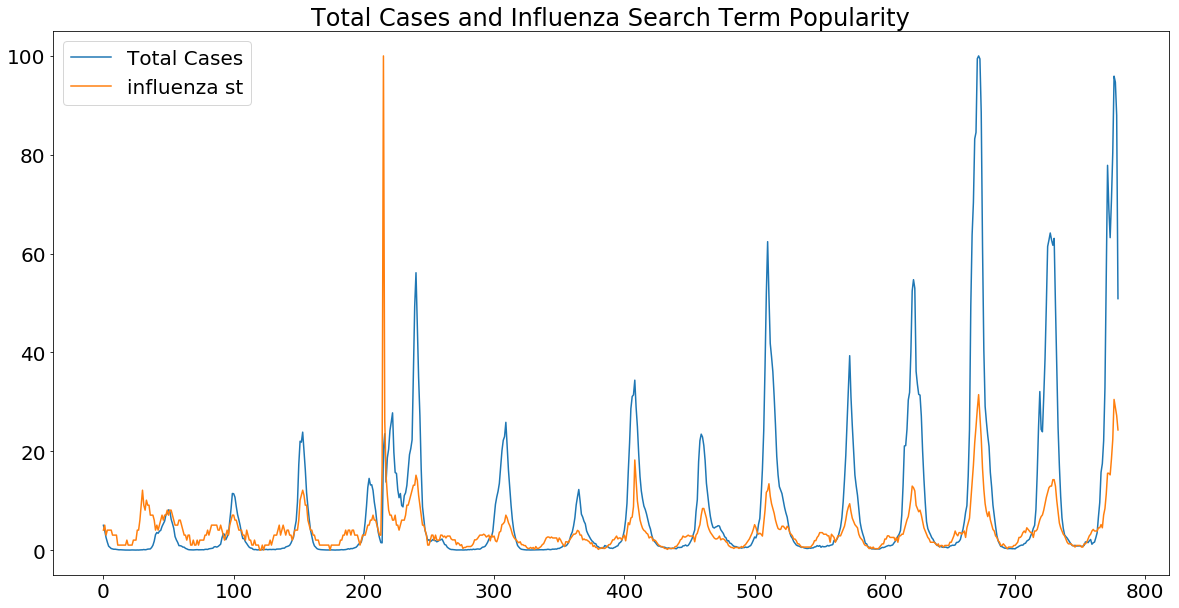

In [43]:
matplotlib.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(20,10))
y = normalize_col('Total Cases',data,100)
y1 = normalize_col('influenza st',data,100)
x = np.arange(len(y1))
plt.plot(x,y)
plt.plot(x,y1)
plt.legend()
plt.title('Total Cases and Influenza Search Term Popularity')

In [44]:
data.to_csv('fulldataset2020.csv')